In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import Conv3D
from keras.layers import MaxPool3D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten

from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [4]:
X = np.load("data/X_KingNB.npy")
X.shape

(12364, 80, 40, 20)

In [5]:
X = np.expand_dims(X, axis=1)
X.shape

(12364, 1, 80, 40, 20)

In [6]:
Y = np.load("data/Y_KingNB.npy")
Y.shape

(12364, 1)

In [7]:
np.unique(Y).shape

(51,)

In [9]:
np.unique(Y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], dtype=int32)

In [10]:
# for idx in range(Y.shape[0]):
#     if Y[idx]>30 and Y[idx]<36:
#         Y[idx] -= 1
# Y[Y==37]=35
# Y[Y==38]=36
# Y[Y==40]=37
# Y[Y==42]=38
# Y[Y==45]=39
# Y[Y==47]=40
# Y[Y==48]=41
# Y[Y==49]=42
# Y[Y==51]=43
# Y[Y==52]=44
# Y[Y==53]=45
# Y[Y==55]=46
# Y[Y==56]=47
# Y[Y==57]=48
# Y[Y==58]=49
# Y[Y==59]=50
# Y[Y==60]=51
Y -= 1
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int32)

In [11]:
Y = np_utils.to_categorical(Y, num_classes=51)

In [12]:
model = Sequential()

model.add(Conv3D(name="conv1-1", activation="relu",
                 input_shape=(1, 80, 40, 20), padding="same",
                 strides=(1, 1, 1), filters=8, kernel_size=(3, 1, 5)))
model.add(Conv3D(name="conv1-2", activation="relu", padding="same",
                 strides=(1, 2, 1), filters=8, kernel_size=(3, 9, 1)))
model.add(MaxPool3D(name="pool-1", pool_size=(1, 1, 2), strides=(1, 2, 1)))

model.add(Conv3D(name="conv2-1", activation="relu", padding="same",
                 strides=(1, 1, 1), filters=16, kernel_size=(3, 1, 4)))
model.add(Conv3D(name="conv2-2", activation="relu", padding="same",
                 strides=(1, 2, 1), filters=16, kernel_size=(3, 8, 1)))
model.add(MaxPool3D(name="pool-2", pool_size=(1, 1, 2), strides=(1, 2, 1)))

model.add(Conv3D(name="conv3-1", activation="relu", padding="same",
                 strides=(1, 1, 1), filters=32, kernel_size=(3, 1, 3)))
model.add(Conv3D(name="conv3-2", activation="relu", padding="same",
                 strides=(1, 1, 1), filters=32, kernel_size=(3, 7, 1)))

model.add(Conv3D(name="conv4-1", activation="relu", padding="same",
                 strides=(1, 1, 1), filters=64, kernel_size=(3, 1, 3)))
model.add(Conv3D(name="conv4-2", activation="relu", padding="same",
                 strides=(1, 1, 1), filters=64, kernel_size=(3, 7, 1)))

model.add(Dense(64, name="fc5"))
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dropout(.5))

model.add(Dense(51, name="fc6"))
model.add(Dropout(.5))
model.add(Activation('softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1-1 (Conv3D)             (None, 1, 80, 40, 8)      2408      
_________________________________________________________________
conv1-2 (Conv3D)             (None, 1, 40, 40, 8)      1736      
_________________________________________________________________
pool-1 (MaxPooling3D)        (None, 1, 20, 39, 8)      0         
_________________________________________________________________
conv2-1 (Conv3D)             (None, 1, 20, 39, 16)     1552      
_________________________________________________________________
conv2-2 (Conv3D)             (None, 1, 10, 39, 16)     6160      
_________________________________________________________________
pool-2 (MaxPooling3D)        (None, 1, 5, 38, 16)      0         
_________________________________________________________________
conv3-1 (Conv3D)             (None, 1, 5, 38, 32)      4640      
__________

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model, iterating on the data in batches of samples
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=500)

Train on 8283 samples, validate on 4081 samples
Epoch 1/10
8283/8283 [==============================] - 650s 78ms/step - loss: 3.8631 - acc: 0.0343 - val_loss: 5.6435 - val_acc: 0.0000e+00
Epoch 2/10
8283/8283 [==============================] - 653s 79ms/step - loss: 3.7052 - acc: 0.0458 - val_loss: 5.6076 - val_acc: 0.0000e+00
Epoch 3/10
8283/8283 [==============================] - 660s 80ms/step - loss: 3.5772 - acc: 0.0607 - val_loss: 5.2521 - val_acc: 0.0000e+00
Epoch 4/10
8283/8283 [==============================] - 661s 80ms/step - loss: 3.4977 - acc: 0.0845 - val_loss: 7.3871 - val_acc: 0.0000e+00
Epoch 5/10
8283/8283 [==============================] - 660s 80ms/step - loss: 3.4319 - acc: 0.1094 - val_loss: 6.5848 - val_acc: 0.0000e+00
Epoch 6/10
8283/8283 [==============================] - 659s 80ms/step - loss: 3.3175 - acc: 0.1433 - val_loss: 7.1657 - val_acc: 0.0000e+00
Epoch 7/10
8283/8283 [==============================] - 659s 80ms/step - loss: 3.3126 - acc: 0.1493 - val_

In [16]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


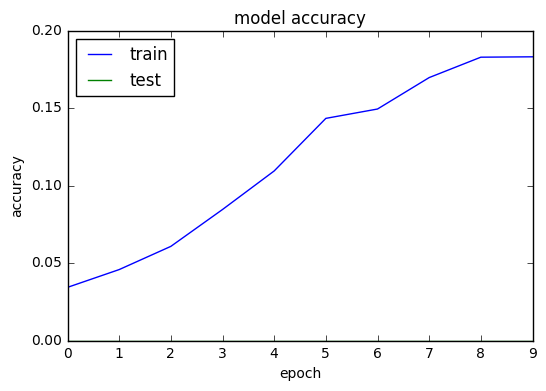

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

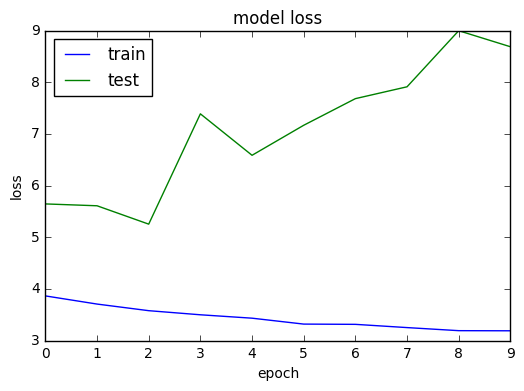

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3D.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model3D.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 21.00%
